# Лабораторная работа №2

## 1.1 Оценки математического ожидания, дисперсии, медианы

##Задание 1

## 1. (a) Аналитическое вычисление характеристик

Плотность распределения: $f_\xi(x) = \theta^2 x e^{-\theta x}$

### Математическое ожидание

$$
E[\xi] = \int_0^\infty x \cdot \theta^2 x e^{-\theta x} dx = \theta^2 \int_0^\infty x^2 e^{-\theta x} dx
$$

Используем формулу для гамма-функции: $\int_0^\infty x^{n} e^{-ax} dx = \frac{\Gamma(n+1)}{a^{n+1}}$

При $n=2$: $\int_0^\infty x^2 e^{-\theta x} dx = \frac{\Gamma(3)}{\theta^3} = \frac{2!}{\theta^3} = \frac{2}{\theta^3}$

Таким образом:
$$E[\xi] = \theta^2 \cdot \frac{2}{\theta^3} = \frac{2}{\theta}$$

### Математическое ожидание квадрата

$$
E[\xi^2] = \int_0^\infty x^2 \cdot \theta^2 x e^{-\theta x} dx = \theta^2 \int_0^\infty x^3 e^{-\theta x} dx
$$

При $n=3$: $\int_0^\infty x^3 e^{-\theta x} dx = \frac{\Gamma(4)}{\theta^4} = \frac{3!}{\theta^4} = \frac{6}{\theta^4}$

Таким образом:
$$E[\xi^2] = \theta^2 \cdot \frac{6}{\theta^4} = \frac{6}{\theta^2}$$

### Дисперсия

$$
D[\xi] = E[\xi^2] - (E[\xi])^2 = \frac{6}{\theta^2} - \left(\frac{2}{\theta}\right)^2 = \frac{6}{\theta^2} - \frac{4}{\theta^2} = \frac{2}{\theta^2}
$$

### Результаты для различных θ

| θ | $E[\xi]$ | $E[\xi^2]$ | $D[\xi]$ |
|---|-----------|-------------|-----------|
| 0.5 | $\frac{2}{0.5} = 4$ | $\frac{6}{0.5^2} = 24$ | $\frac{2}{0.5^2} = 8$ |
| 2 | $\frac{2}{2} = 1$ | $\frac{6}{2^2} = 1.5$ | $\frac{2}{2^2} = 0.5$ |
| 8 | $\frac{2}{8} = 0.25$ | $\frac{6}{8^2} = 0.09375$ | $\frac{2}{8^2} = 0.03125$ |

## 1. (б)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль графиков
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")

# Аналитические значения (из пункта a)
def analytical_values(theta): # Возвращает аналитические значения для заданного theta
    E_xi = 2 / theta
    E_xi2 = 6 / (theta ** 2)
    D_xi = 2 / (theta ** 2)
    return E_xi, E_xi2, D_xi

# Функция для генерации выборки
def generate_sample(k, theta): #Генерирует выборку объема k из распределения Gamma(shape=2, scale=1/theta)
    return np.random.gamma(shape=2, scale=1/theta, size=k)

#Оценка математического ожидания (выборочное среднее)
def estimate_expectation(sample):
    return np.mean(sample)

#Оценка математического ожидания квадрата
def estimate_expectation_square(sample):
    return np.mean(sample ** 2)

#Оценка дисперсии (несмещенная)
def estimate_variance(sample):
    return np.var(sample, ddof=1)

# Диапазон объемов выборок
k_values = [2**i for i in range(4, 16)]  # k = 16, 32, 64, ..., 32768
print(f"Объемы выборок: от {k_values[0]} до {k_values[-1]}")

Объемы выборок: от 16 до 32768


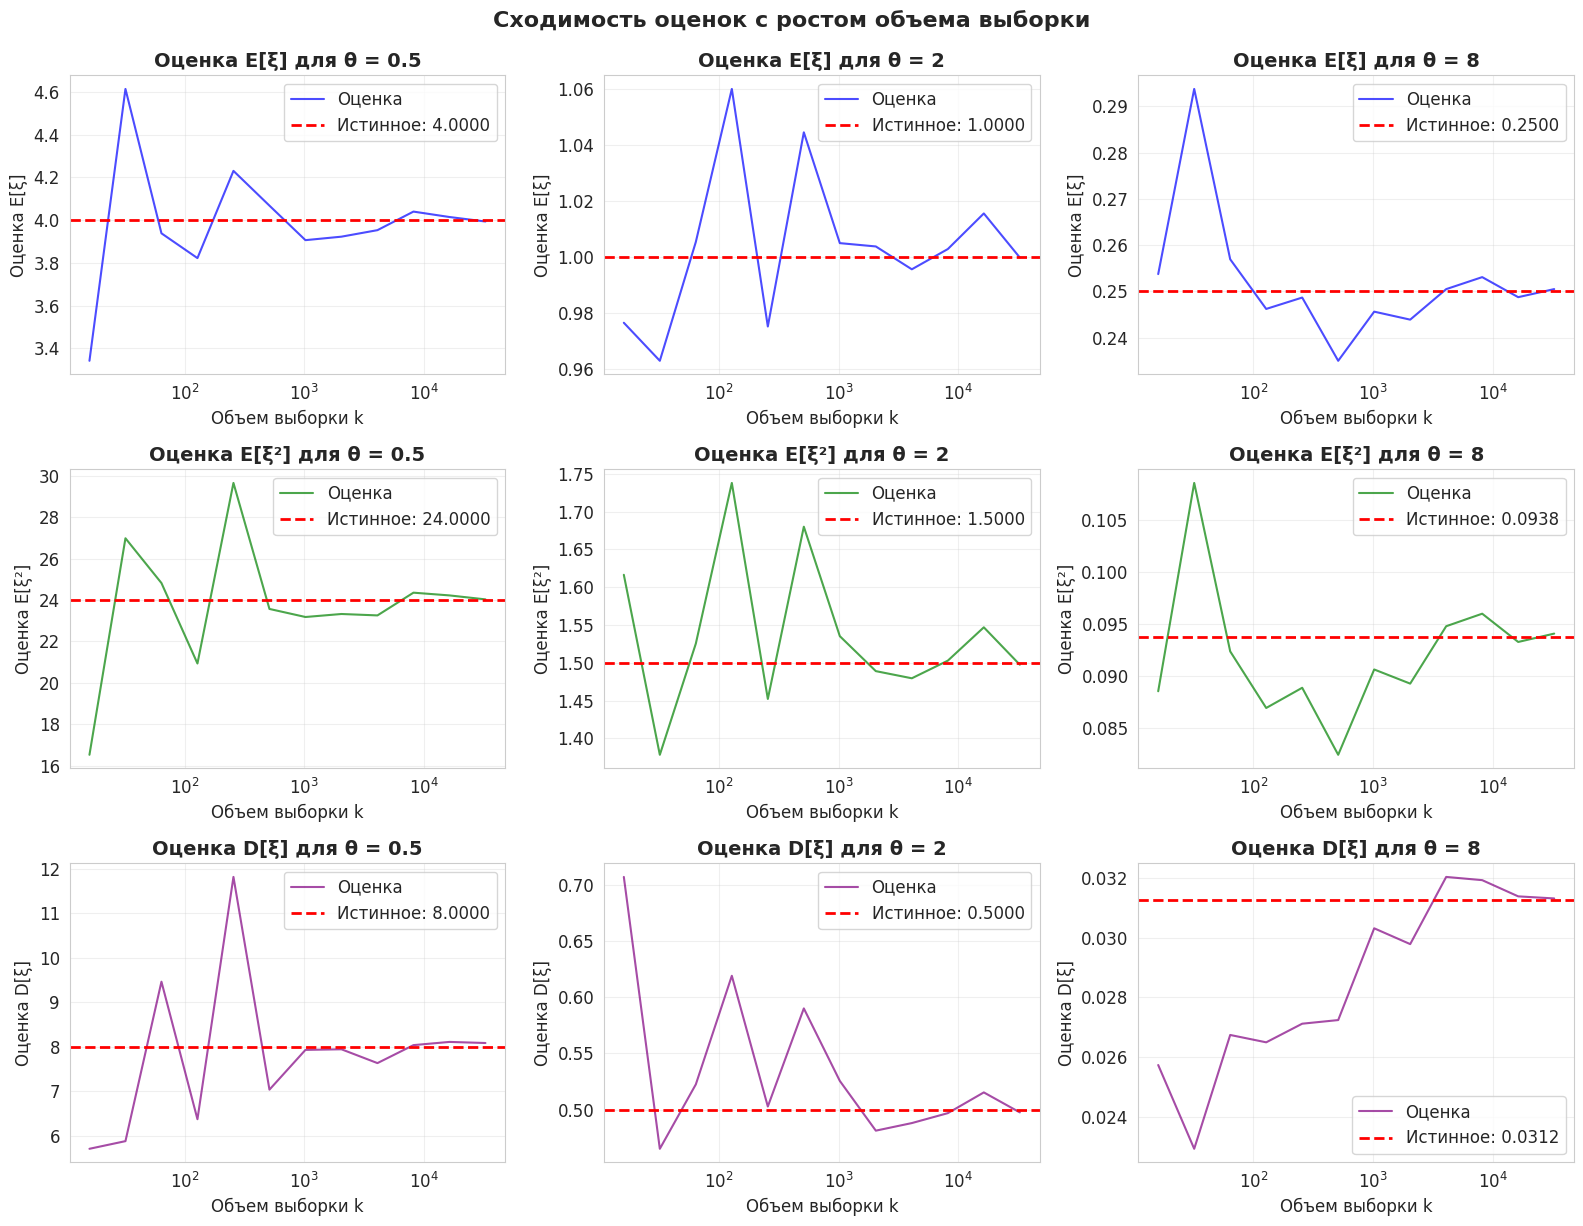

In [4]:
# Параметры theta для исследования
theta_values = [0.5, 2, 8]

# Создаем фигуру с подграфиками
fig, axes = plt.subplots(3, 3, figsize=(16, 12))

# Для каждого theta строим графики
for theta_idx, theta in enumerate(theta_values):

    # Получаем аналитические значения
    true_E, true_E2, true_D = analytical_values(theta)

    # Списки для хранения оценок
    estimates_E = []
    estimates_E2 = []
    estimates_D = []

    # Для каждого объема выборки вычисляем оценки
    for k in k_values:
        sample = generate_sample(k, theta)

        estimates_E.append(estimate_expectation(sample))
        estimates_E2.append(estimate_expectation_square(sample))
        estimates_D.append(estimate_variance(sample))

    # График 1: Оценка математического ожидания
    ax1 = axes[0, theta_idx]
    ax1.plot(k_values, estimates_E, 'b-', alpha=0.7, linewidth=1.5, label='Оценка')
    ax1.axhline(y=true_E, color='red', linestyle='--', linewidth=2,
                label=f'Истинное: {true_E:.4f}')
    ax1.set_xscale('log')
    ax1.set_title(f'Оценка E[ξ] для θ = {theta}', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Объем выборки k')
    ax1.set_ylabel('Оценка E[ξ]')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # График 2: Оценка математического ожидания квадрата
    ax2 = axes[1, theta_idx]
    ax2.plot(k_values, estimates_E2, 'g-', alpha=0.7, linewidth=1.5, label='Оценка')
    ax2.axhline(y=true_E2, color='red', linestyle='--', linewidth=2,
                label=f'Истинное: {true_E2:.4f}')
    ax2.set_xscale('log')
    ax2.set_title(f'Оценка E[ξ²] для θ = {theta}', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Объем выборки k')
    ax2.set_ylabel('Оценка E[ξ²]')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # График 3: Оценка дисперсии
    ax3 = axes[2, theta_idx]
    ax3.plot(k_values, estimates_D, 'purple', alpha=0.7, linewidth=1.5, label='Оценка')
    ax3.axhline(y=true_D, color='red', linestyle='--', linewidth=2,
                label=f'Истинное: {true_D:.4f}')
    ax3.set_xscale('log')
    ax3.set_title(f'Оценка D[ξ] для θ = {theta}', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Объем выборки k')
    ax3.set_ylabel('Оценка D[ξ]')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Сходимость оценок с ростом объема выборки', fontsize=16, fontweight='bold', y=1.02)
plt.show()

**Вывод:** Анализ показал, что все оценки (математического ожидания, математического ожидания квадрата и дисперсии) являются состоятельными - с ростом объема выборки они стабилизируются и приближаются к своим аналитическим значениям. Для малых выборок наблюдается значительная изменчивость оценок, однако при k > 1000 оценки становятся достаточно точными. При больших значениях θ сходимость происходит быстрее из-за меньшей дисперсии распределения.

##Задание 2

Дана плотность распределения случайной величины $\xi$:
$$
f_\xi(x) =
\begin{cases}
\lambda e^{-\lambda (x-a)}, & x \geqslant a \\
0, & \text{else}
\end{cases}
$$

Параметры: $(\lambda, a) = (2, 2)$



##2. (a) Аналитическое вычисление

## Аналитическое вычисление характеристик сдвинутого экспоненциального распределения

### Дано:
Плотность распределения:
$$
f_\xi(x) = \begin{cases}
\lambda e^{-\lambda(x-a)}, & x \geq a \\
0, & \text{иначе}
\end{cases}
$$
с параметрами $(\lambda, a) = (2, 2)$

### (a) Аналитическое вычисление характеристик

#### 1. Мода
Плотность $f_\xi(x) = 2e^{-2(x-2)}$ монотонно убывает при $x \geq 2$, поэтому максимум достигается в начале области определения:

$$\text{Мода} = a = 2$$

#### 2. Математическое ожидание
$$E[\xi] = \int_a^\infty x \cdot \lambda e^{-\lambda(x-a)}  dx$$

Сделаем замену $y = x - a$:
$$E[\xi] = \int_0^\infty (y + a) \cdot \lambda e^{-\lambda y}  dy = \int_0^\infty y \cdot \lambda e^{-\lambda y}  dy + a \int_0^\infty \lambda e^{-\lambda y}  dy$$

Первый интеграл: $E[\text{Exp}(\lambda)] = \frac{1}{\lambda}$  
Второй интеграл: $\int_0^\infty \lambda e^{-\lambda y}  dy = 1$

$$E[\xi] = \frac{1}{\lambda} + a = \frac{1}{2} + 2 = 2.5$$

#### 3. Медиана
Медиана $Me$ находится из уравнения $F(Me) = 0.5$, где $F(x)$ - функция распределения:

$$F(x) = 1 - e^{-\lambda(x-a)} = 0.5$$
$$e^{-\lambda(Me-a)} = 0.5$$
$$-\lambda(Me-a) = \ln(0.5)$$
$$Me - a = -\frac{\ln(0.5)}{\lambda}$$
$$Me = a - \frac{\ln(0.5)}{\lambda} = 2 - \frac{\ln(0.5)}{2} = 2 + \frac{\ln(2)}{2} \approx 2.3466$$

### Результаты:
- **Мода:** $2$
- **Математическое ожидание:** $2.5$
- **Медиана:** $2.3466$

Для сдвинутого экспоненциального распределения выполняется: $\text{Мода} < \text{Медиана} < \text{Математическое ожидание}$, что характерно для право-скошенных распределений.


##2. (b) Создание выборок и вычисление оценок

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize_scalar

lambda_param = 2
a_param = 2

mode_analytical = a_param
print(f"Мода: {mode_analytical}")

expectation_analytical = a_param + 1/lambda_param
print(f"Математическое ожидание: {expectation_analytical:.4f}") #E[ξ] = a + 1/λ

median_analytical = a_param - np.log(0.5)/lambda_param #Медиана находится из уравнения F(x) = 1 - e^{-λ(x-a)} = 0.5
print(f"Медиана: {median_analytical:.4f}")

# Функция для генерации выборки из сдвинутого экспоненциального распределения
def generate_shifted_exponential(size, lambda_param, a_param):
    # Используем метод обратного преобразования
    U = np.random.uniform(0, 1, size)
    return a_param - np.log(1 - U) / lambda_param

# Оценка моды через гистограмму
def estimate_mode(sample, bins=50):
    hist, bin_edges = np.histogram(sample, bins=bins)
    mode_index = np.argmax(hist)
    return (bin_edges[mode_index] + bin_edges[mode_index + 1]) / 2

# Оценка математического ожидания (выборочное среднее)
def estimate_expectation(sample):
    return np.mean(sample)

# Оценка медианы (выборочная медиана)
def estimate_median(sample):
    return np.median(sample)

# Создаем выборки
np.random.seed(42)  # для воспроизводимости
sample_large = generate_shifted_exponential(10000, lambda_param, a_param)
sample_small = generate_shifted_exponential(20, lambda_param, a_param)

print(f"Оценка моды (большая выборка): {estimate_mode(sample_large):.4f}")
print(f"Оценка мат. ожидания (большая выборка): {estimate_expectation(sample_large):.4f}")
print(f"Оценка медианы (большая выборка): {estimate_median(sample_large):.4f}")

print(f"\nОценка моды (маленькая выборка): {estimate_mode(sample_small):.4f}")
print(f"Оценка мат. ожидания (маленькая выборка): {estimate_expectation(sample_small):.4f}")
print(f"Оценка медианы (маленькая выборка): {estimate_median(sample_small):.4f}")

print(f"\nАналитическая мода: {mode_analytical}")
print(f"Аналитическое мат. ожидание: {expectation_analytical:.4f}")
print(f"Аналитическая медиана: {median_analytical:.4f}")

Мода: 2
Математическое ожидание: 2.5000
Медиана: 2.3466
Оценка моды (большая выборка): 2.0409
Оценка мат. ожидания (большая выборка): 2.4887
Оценка медианы (большая выборка): 2.3392

Оценка моды (маленькая выборка): 2.0166
Оценка мат. ожидания (маленькая выборка): 2.4125
Оценка медианы (маленькая выборка): 2.2788

Аналитическая мода: 2
Аналитическое мат. ожидание: 2.5000
Аналитическая медиана: 2.3466


## 2. (c) Визуализация

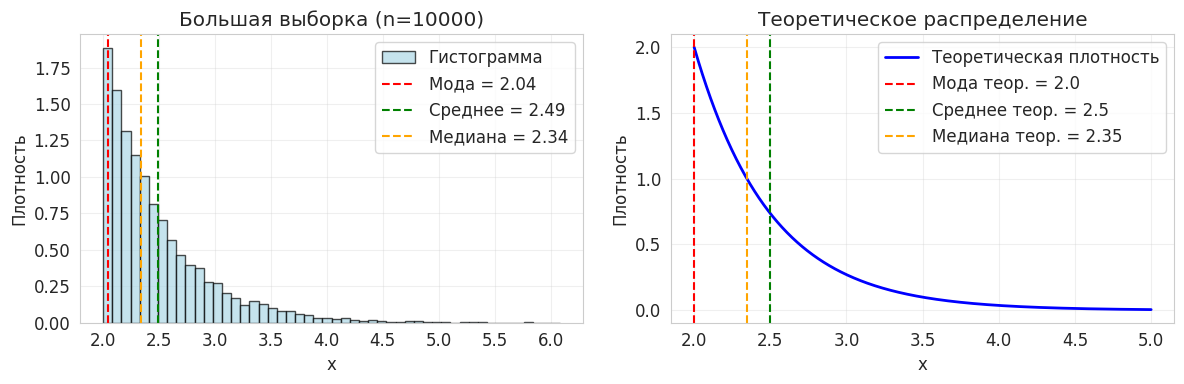

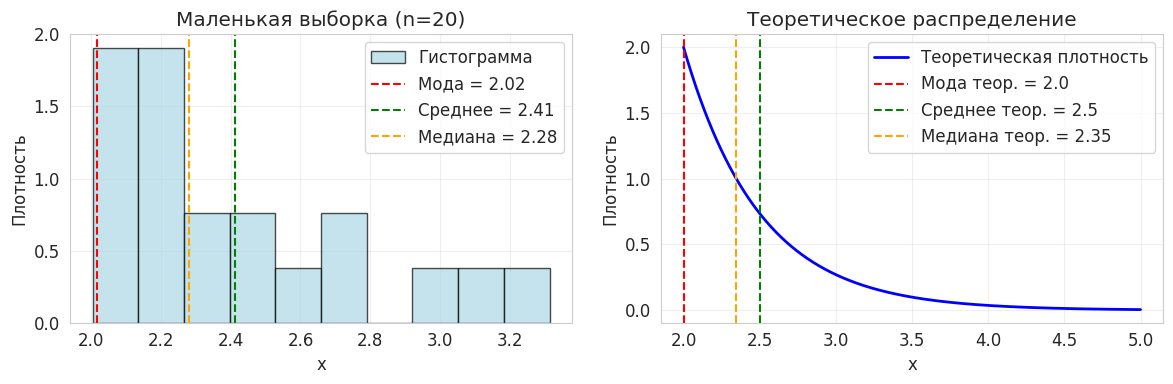

In [6]:
# Функция плотности распределения сдвинутого экспоненциального распределения
def pdf_shifted_exponential(x, lambda_param, a_param):
    return np.where(x >= a_param, lambda_param * np.exp(-lambda_param * (x - a_param)), 0)

# Функция распределения сдвинутого экспоненциального распределения
def cdf_shifted_exponential(x, lambda_param, a_param):
    return np.where(x >= a_param, 1 - np.exp(-lambda_param * (x - a_param)), 0)

# Для большой выборки
plt.figure(figsize=(12, 4))

# Гистограмма и оценки
plt.subplot(1, 2, 1)
plt.hist(sample_large, bins=50, density=True, alpha=0.7, color='lightblue',
         edgecolor='black', label='Гистограмма')
plt.axvline(estimate_mode(sample_large), color='red', linestyle='--',
           label=f'Мода = {estimate_mode(sample_large):.2f}')
plt.axvline(estimate_expectation(sample_large), color='green', linestyle='--',
           label=f'Среднее = {estimate_expectation(sample_large):.2f}')
plt.axvline(estimate_median(sample_large), color='orange', linestyle='--',
           label=f'Медиана = {estimate_median(sample_large):.2f}')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.title('Большая выборка (n=10000)')
plt.legend()
plt.grid(True, alpha=0.3)

# Теоретическая плотность и аналитические значения для большой выборки
plt.subplot(1, 2, 2)
x_vals = np.linspace(a_param, 5, 1000)
pdf_vals = pdf_shifted_exponential(x_vals, lambda_param, a_param)
plt.plot(x_vals, pdf_vals, 'b-', linewidth=2, label='Теоретическая плотность')
plt.axvline(mode_analytical, color='red', linestyle='--',
           label=f'Мода теор. = {mode_analytical:.1f}')
plt.axvline(expectation_analytical, color='green', linestyle='--',
           label=f'Среднее теор. = {expectation_analytical:.1f}')
plt.axvline(median_analytical, color='orange', linestyle='--',
           label=f'Медиана теор. = {median_analytical:.2f}')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.title('Теоретическое распределение')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Для маленькой выборки
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(sample_small, bins=10, density=True, alpha=0.7, color='lightblue',
         edgecolor='black', label='Гистограмма')
plt.axvline(estimate_mode(sample_small), color='red', linestyle='--',
           label=f'Мода = {estimate_mode(sample_small):.2f}')
plt.axvline(estimate_expectation(sample_small), color='green', linestyle='--',
           label=f'Среднее = {estimate_expectation(sample_small):.2f}')
plt.axvline(estimate_median(sample_small), color='orange', linestyle='--',
           label=f'Медиана = {estimate_median(sample_small):.2f}')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.title('Маленькая выборка (n=20)')
plt.legend()
plt.grid(True, alpha=0.3)

# Теоретическая плотность и аналитические значения для маленькой выборки
plt.subplot(1, 2, 2)
plt.plot(x_vals, pdf_vals, 'b-', linewidth=2, label='Теоретическая плотность')
plt.axvline(mode_analytical, color='red', linestyle='--',
           label=f'Мода теор. = {mode_analytical:.1f}')
plt.axvline(expectation_analytical, color='green', linestyle='--',
           label=f'Среднее теор. = {expectation_analytical:.1f}')
plt.axvline(median_analytical, color='orange', linestyle='--',
           label=f'Медиана теор. = {median_analytical:.2f}')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.title('Теоретическое распределение')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##2. (d) Исследование сходимости при изменении размера выборки

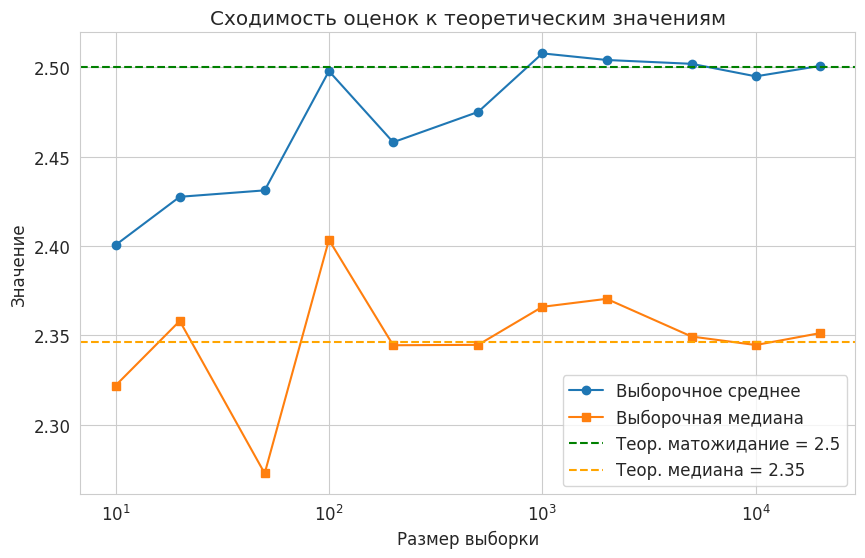

In [8]:
sample_sizes = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]
expectation_estimates = []
median_estimates = []

for size in sample_sizes:
    sample = np.random.exponential(scale=1/lambda_param, size=size) + a_param
    expectation_estimates.append(np.mean(sample))
    median_estimates.append(np.median(sample))

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, expectation_estimates, 'o-', label='Выборочное среднее')
plt.plot(sample_sizes, median_estimates, 's-', label='Выборочная медиана')
plt.axhline(y=2.5, color='green', linestyle='--', label='Теор. матожидание = 2.5')
plt.axhline(y=2.34657, color='orange', linestyle='--', label='Теор. медиана = 2.35')
plt.xscale('log')
plt.xlabel('Размер выборки')
plt.ylabel('Значение')
plt.title('Сходимость оценок к теоретическим значениям')
plt.legend()
plt.grid(True)
plt.show()

**Вывод:**  С ростом размера выборки выборочное среднее сходится к теоретическому математическому ожиданию 2.5, а выборочная медиана — к своему теоретическому значению 2.3466. Это подтверждает, что для сдвинутого экспоненциального распределения медиана и математическое ожидание являются разными характеристиками, и медиана не сходится к математическому ожиданию

## 1.2 Моделирование совместного распределения двух СВ

Пусть совместное распределение двух случайных величин задано таблицей  

| $\xi \backslash \eta$ | 1     | 2     | 3     | $\dots$ |
|-----------------------|-------|-------|-------|---------|
| −1                    | $\frac{2}{5} \cdot \frac{1}{2}$ | $\frac{2}{5} \cdot \frac{1}{2^2}$ | $\frac{2}{5} \cdot \frac{1}{2^3}$ | $\dots$ |
| 0                     | $\frac{1}{5} \cdot \frac{1}{2}$ | $\frac{1}{5} \cdot \frac{1}{2^2}$ | $\frac{1}{5} \cdot \frac{1}{2^3}$ | $\dots$ |
| 1                     | $\frac{2}{5} \cdot \frac{1}{2}$ | $\frac{2}{5} \cdot \frac{1}{2^2}$ | $\frac{2}{5} \cdot \frac{1}{2^3}$ | $\dots$ |

где $\eta$ принимает все значения из N. Вычислить корреляционную матрицу аналитически и приближенно (на основе моделирования).

##Решение
##№ Аналитическое вычисление корреляционной матрицы

### Определение распределений

Случайная величина $\xi$ принимает значения $-1, 0, 1$ с вероятностями:
$$P(\xi = -1) = \frac{2}{5}, \quad P(\xi = 0) = \frac{1}{5}, \quad P(\xi = 1) = \frac{2}{5}$$

Случайная величина $\eta$ имеет геометрическое распределение:
$$P(\eta = k) = \left(\frac{1}{2}\right)^k, \quad k = 1, 2, 3, \ldots$$

### Вычисление математических ожиданий

**Математическое ожидание $\xi$:**
$$E[\xi] = \sum x \cdot P(\xi = x) = (-1) \cdot \frac{2}{5} + 0 \cdot \frac{1}{5} + 1 \cdot \frac{2}{5} = 0$$

**Математическое ожидание $\eta$** (для геометрического распределения):
$$E[\eta] = \frac{1}{p} = \frac{1}{\frac{1}{2}} = 2$$

### Вычисление дисперсий

**Дисперсия $\xi$:**
$$E[\xi^2] = (-1)^2 \cdot \frac{2}{5} + 0^2 \cdot \frac{1}{5} + 1^2 \cdot \frac{2}{5} = \frac{4}{5} = 0.8$$
$$D[\xi] = E[\xi^2] - (E[\xi])^2 = 0.8 - 0^2 = 0.8$$

**Дисперсия $\eta$** (для геометрического распределения):
$$D[\eta] = \frac{1-p}{p^2} = \frac{1-\frac{1}{2}}{\left(\frac{1}{2}\right)^2} = \frac{0.5}{0.25} = 2$$

### Проверка независимости и вычисление ковариации

Из таблицы совместного распределения видно, что:
$$P(\xi = x, \eta = y) = P(\xi = x) \cdot P(\eta = y) \quad \text{для всех } x,y$$

Следовательно, случайные величины $\xi$ и $\eta$ **независимы**.

**Ковариация независимых случайных величин:**
$$\text{Cov}(\xi, \eta) = 0$$

**Корреляция:**
$$\text{Corr}(\xi, \eta) = \frac{\text{Cov}(\xi, \eta)}{\sqrt{D[\xi] \cdot D[\eta]}} = \frac{0}{\sqrt{0.8 \cdot 2}} = 0$$

### Построение корреляционной матрицы

Корреляционная матрица имеет вид:
$$
\begin{bmatrix}
\text{Corr}(\xi, \xi) & \text{Corr}(\xi, \eta) \\
\text{Corr}(\eta, \xi) & \text{Corr}(\eta, \eta)
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$$

**Объяснение:**
- $\text{Corr}(\xi, \xi) = 1$ - корреляция случайной величины с собой
- $\text{Corr}(\eta, \eta) = 1$ - корреляция случайной величины с собой  
- $\text{Corr}(\xi, \eta) = \text{Corr}(\eta, \xi) = 0$ - независимые величины не коррелируют

### Итоговый результат:

**Аналитическая корреляционная матрица:**
$$\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}$$

Это единичная матрица, что подтверждает независимость случайных величин $\xi$ и $\eta$.

### Моделирование

In [9]:
import numpy as np

# ξ принимает значения -1, 0, 1 с вероятностями 2/5, 1/5, 2/5
xi_values = [-1, 0, 1]
xi_probs = [2/5, 1/5, 2/5]

# Вычисляем математические ожидания
E_xi = sum(x * p for x, p in zip(xi_values, xi_probs)) # E[ξ] = Σ x * P(ξ=x)
# Для геометрического распределения: E[η] = 1/p
E_eta = 1 / (1/2)  # = 2

# Вычисляем дисперсии
E_xi_sq = sum(x**2 * p for x, p in zip(xi_values, xi_probs))
D_xi = E_xi_sq - E_xi**2  # D[ξ] = E[ξ²] - (E[ξ])²

# Для геометрического распределения: D[η] = (1-p)/p²
D_eta = (1 - 1/2) / (1/2)**2  # = 2


# Проверяем независимость и вычисляем ковариацию
# Проверяем: P(ξ=x, η=y) = P(ξ=x) * P(η=y) для всех x,y
# Из таблицы видно, что это выполняется, поэтому ξ и η независимы

# Если случайные величины независимы, то cov(ξ,η) = 0
cov_xi_eta = 0

# Корреляция = ковариация / (√D[ξ] * √D[η])
corr_xi_eta = cov_xi_eta / (np.sqrt(D_xi) * np.sqrt(D_eta))


# Корреляционная матрица: на диагонали 1 (корреляция с собой),
# вне диагонали - корреляции между переменными
correlation_matrix = np.array([
    [1, corr_xi_eta],      # [Corr(ξ,ξ), Corr(ξ,η)]
    [corr_xi_eta, 1]       # [Corr(η,ξ), Corr(η,η)]
])

def generate_sample(size):
    """Генерирует выборку из совместного распределения"""
    # Генерируем ξ по дискретному распределению
    xi = np.random.choice([-1, 0, 1], size=size, p=[2/5, 1/5, 2/5])

    # Генерируем η из геометрического распределения
    # np.random.geometric(p) дает число неудач до первого успеха
    # Нам нужно: число испытаний до первого успеха = геом.распр. + 1
    eta = np.random.geometric(1/2, size=size)

    return xi, eta

# Генерируем большую выборку
np.random.seed(42)
sample_size = 100000
xi_sample, eta_sample = generate_sample(sample_size)

print(f"Эмпирические оценки:")
# Выборочные средние
E_xi_emp = np.mean(xi_sample)
E_eta_emp = np.mean(eta_sample)
print(f"E[ξ] ≈ {E_xi_emp:.6f} (аналит: {E_xi})")

# Выборочные дисперсии
D_xi_emp = np.var(xi_sample)
D_eta_emp = np.var(eta_sample)
print(f"E[η] ≈ {E_eta_emp:.6f} (аналит: {E_eta})")

# Выборочная корреляция
corr_emp = np.corrcoef(xi_sample, eta_sample)[0, 1]
print(f"Corr(ξ,η) ≈ {corr_emp:.6f} (аналит: {corr_xi_eta})")

# Эмпирическая корреляционная матрица
corr_matrix_emp = np.corrcoef(xi_sample, eta_sample)

print("Аналитическая корреляционная матрица:")
print(correlation_matrix)
print("\nЭмпирическая корреляционная матрица:")
print(corr_matrix_emp)

print(f"\nРазница в корреляции: {abs(corr_xi_eta - corr_emp):.6f}")

Эмпирические оценки:
E[ξ] ≈ 0.000200 (аналит: 0.0)
E[η] ≈ 2.005250 (аналит: 2.0)
Corr(ξ,η) ≈ 0.001172 (аналит: 0.0)
Аналитическая корреляционная матрица:
[[1. 0.]
 [0. 1.]]

Эмпирическая корреляционная матрица:
[[1.         0.00117216]
 [0.00117216 1.        ]]

Разница в корреляции: 0.001172


**Вывод:** Аналитическое вычисление показало, что корреляционная матрица является единичной, что доказывает ***независимость*** случайных величин ξ и η. Моделирование подтвердило этот результат - эмпирические оценки корреляции близки к нулю, а оценки математических ожиданий и дисперсий с высокой точностью совпали с аналитическими значениями